In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

from main import main, parse_args

from argparse import Namespace
from utils.plotting import plot_change_responses, plot_omission_responses, plot_sequence_response
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

import os

In [2]:
def load_results_files(directory, prefix):
    # Ensure directory exists
    if not os.path.isdir(directory):
        print(f"Error: {directory} is not a valid directory.")
        return {}

    # Get list of files in directory
    files = os.listdir(directory)
    # Filter files by prefix and ending with '.pt'
    torch_files = [file for file in files if file.startswith(prefix)]

    args = None

    change_responses = {"familiar": {}, "novel": {}}
    omission_responses = {"familiar": {}, "novel": {}}
    for file in torch_files:
        file_path = os.path.join(directory, file)
        try:
            # Load Torch file
            data = torch.load(file_path)
            # Concatenate tensors along the first axis

            if args is None:
                args = data['args']

            # first for change responses
            for key in data["change_responses"]["familiar"].keys():
                fam_value = data["change_responses"]["familiar"][key]
                nov_value = data["change_responses"]["novel"][key]
                if key not in change_responses["familiar"]:
                    change_responses["familiar"][key] = fam_value
                    change_responses["novel"][key] = nov_value
                else:
                    change_responses["familiar"][key] = torch.cat([change_responses["familiar"][key], fam_value])
                    change_responses["novel"][key] = torch.cat([change_responses["novel"][key], nov_value])
            
            # now for omission responses
            for key in data["omission_responses"]["familiar"].keys():
                fam_value = data["omission_responses"]["familiar"][key]
                nov_value = data["omission_responses"]["novel"][key]
                if key not in omission_responses["familiar"]:
                    omission_responses["familiar"][key] = fam_value
                    omission_responses["novel"][key] = nov_value
                else:
                    omission_responses["familiar"][key] = torch.cat([omission_responses["familiar"][key], fam_value])
                    omission_responses["novel"][key] = torch.cat([omission_responses["novel"][key], nov_value])

            print(f"Loaded {file}")
        except Exception as e:
            print(f"Error loading {file}: {str(e)}")
    return args, change_responses, omission_responses

In [3]:
args = parse_args()
args.perception_only = True
args.lambda_reward = 0.0

for i in range(10):
    args.seed = np.random.randint(1001, 9999)
    args.progress_mode = 'epoch'
    model, data, output = main(args)
    Y_train, Y_test, Y_train_om, train_ts, test_ts, train_om_ts, train_oms, test_oms = data.values()
    train_responses, train_responses_om, test_responses, test_om_indcs, train_om_indcs = output.values()
    change_responses, omission_responses = process_outputs(args, model, data, output)
    save_dir = "./results/perception_only"
    torch.save({
        "args": vars(args),
        "model": model.state_dict(),
        "change_responses": change_responses,
        "omission_responses": omission_responses
    }, os.path.join(save_dir, f"perception_only_{args.seed}"))
    print("")

100%|██████████| 200/200 [03:01<00:00,  1.10epoch/s, energy=0.0849, rewards=nan, spatial=0.325, temporal=0.086, total=0.496, value=nan] 


100%|██████████| 200/200 [03:04<00:00,  1.08epoch/s, energy=0.0984, rewards=nan, spatial=0.325, temporal=0.0931, total=0.517, value=nan]


100%|██████████| 200/200 [03:02<00:00,  1.09epoch/s, energy=0.119, rewards=nan, spatial=0.317, temporal=0.0971, total=0.533, value=nan]


100%|██████████| 200/200 [03:01<00:00,  1.10epoch/s, energy=0.086, rewards=nan, spatial=0.322, temporal=0.0892, total=0.497, value=nan] 


100%|██████████| 200/200 [03:00<00:00,  1.11epoch/s, energy=0.0947, rewards=nan, spatial=0.325, temporal=0.0938, total=0.514, value=nan]


100%|██████████| 200/200 [02:59<00:00,  1.11epoch/s, energy=0.101, rewards=nan, spatial=0.325, temporal=0.0939, total=0.521, value=nan]


100%|██████████| 200/200 [03:02<00:00,  1.10epoch/s, energy=0.102, rewards=nan, spatial=0.32, temporal=0.0917, total=0.513, value=nan] 


100%|██████████| 200/200 [03:01<00:00,  1.10epoch/s, energy=0.116, rewards=nan, spatial=0.325, temporal=0.0995, total=0.541, value=nan]


100%|██████████| 200/200 [03:02<00:00,  1.09epoch/s, energy=0.101, rewards=nan, spatial=0.322, temporal=0.0916, total=0.515, value=nan]


100%|██████████| 200/200 [03:00<00:00,  1.11epoch/s, energy=0.103, rewards=nan, spatial=0.32, temporal=0.0916, total=0.515, value=nan] 


In [4]:
args = parse_args()
args.perception_only = False
args.lambda_reward = 0.1

for i in range(10):
    args.seed = np.random.randint(1001, 9999)
    args.progress_mode = 'epoch'
    model, data, output = main(args)
    Y_train, Y_test, Y_train_om, train_ts, test_ts, train_om_ts, train_oms, test_oms = data.values()
    train_responses, train_responses_om, test_responses, test_om_indcs, train_om_indcs = output.values()
    change_responses, omission_responses = process_outputs(args, model, data, output)
    save_dir = "./results/perception_action"
    torch.save({
        "args": vars(args),
        "model": model.state_dict(),
        "change_responses": change_responses,
        "omission_responses": omission_responses
    }, os.path.join(save_dir, f"perception_action_{args.seed}"))
    print("")

100%|██████████| 200/200 [03:50<00:00,  1.15s/epoch, energy=0.135, rewards=17.3, spatial=0.325, temporal=0.124, total=0.792, value=2.08] 


100%|██████████| 200/200 [03:52<00:00,  1.16s/epoch, energy=0.14, rewards=17.9, spatial=0.32, temporal=0.124, total=0.801, value=2.16]   


100%|██████████| 200/200 [03:55<00:00,  1.18s/epoch, energy=0.139, rewards=17.8, spatial=0.322, temporal=0.128, total=0.803, value=2.14] 


100%|██████████| 200/200 [03:55<00:00,  1.18s/epoch, energy=0.147, rewards=19, spatial=0.321, temporal=0.13, total=0.801, value=2.03]    


100%|██████████| 200/200 [03:52<00:00,  1.16s/epoch, energy=0.143, rewards=17, spatial=0.325, temporal=0.129, total=0.813, value=2.17]   


100%|██████████| 200/200 [03:52<00:00,  1.16s/epoch, energy=0.121, rewards=17.6, spatial=0.323, temporal=0.126, total=0.773, value=2.03] 


100%|██████████| 200/200 [03:51<00:00,  1.16s/epoch, energy=0.128, rewards=17.1, spatial=0.33, temporal=0.122, total=0.804, value=2.24]    


100%|██████████| 200/200 [03:52<00:00,  1.16s/epoch, energy=0.134, rewards=16.2, spatial=0.325, temporal=0.123, total=0.806, value=2.24] 


100%|██████████| 200/200 [03:54<00:00,  1.17s/epoch, energy=0.138, rewards=18.6, spatial=0.318, temporal=0.134, total=0.789, value=1.99] 


100%|██████████| 200/200 [03:52<00:00,  1.16s/epoch, energy=0.14, rewards=18.3, spatial=0.32, temporal=0.133, total=0.8, value=2.07]     


#### Perception only

In [5]:
args, change_responses, omission_responses = load_results_files("./results/perception_only", "perception_only")
args = Namespace(**args)

Loaded perception_only_7539
Loaded perception_only_4792
Loaded perception_only_6559
Loaded perception_only_3445
Loaded perception_only_8918
Loaded perception_only_3166
Loaded perception_only_2351
Loaded perception_only_4630
Loaded perception_only_4934
Loaded perception_only_4366


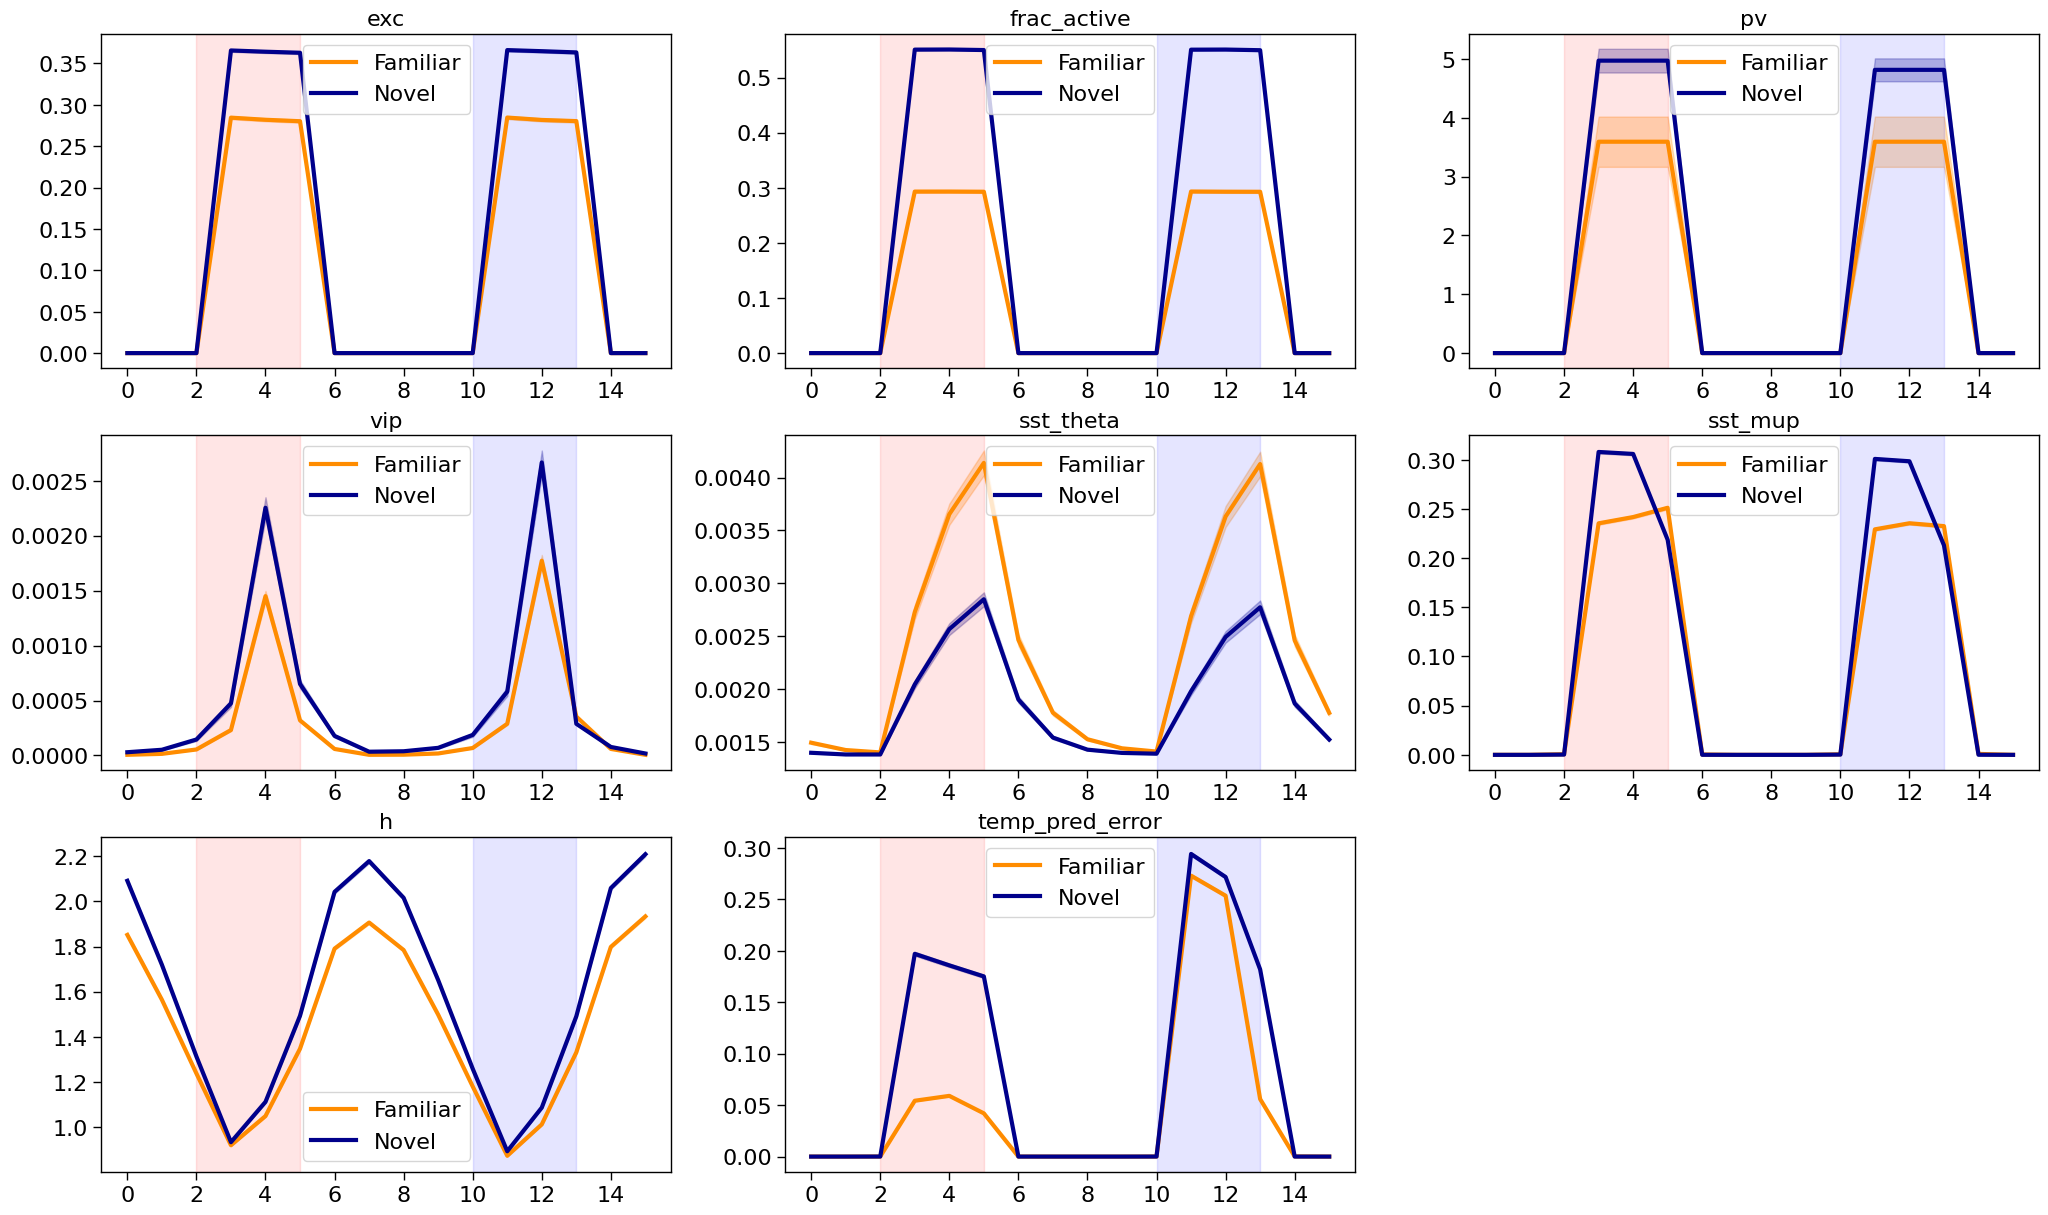

In [6]:
##### plot responses around image change

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(change_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_change_responses(args, ax, change_responses['familiar'][pop], "Familiar", "darkorange")
        plot_change_responses(args, ax, change_responses['novel'][pop], "Novel", "darkblue")
        ax.set_title(f"{pop}")
        ax.legend()

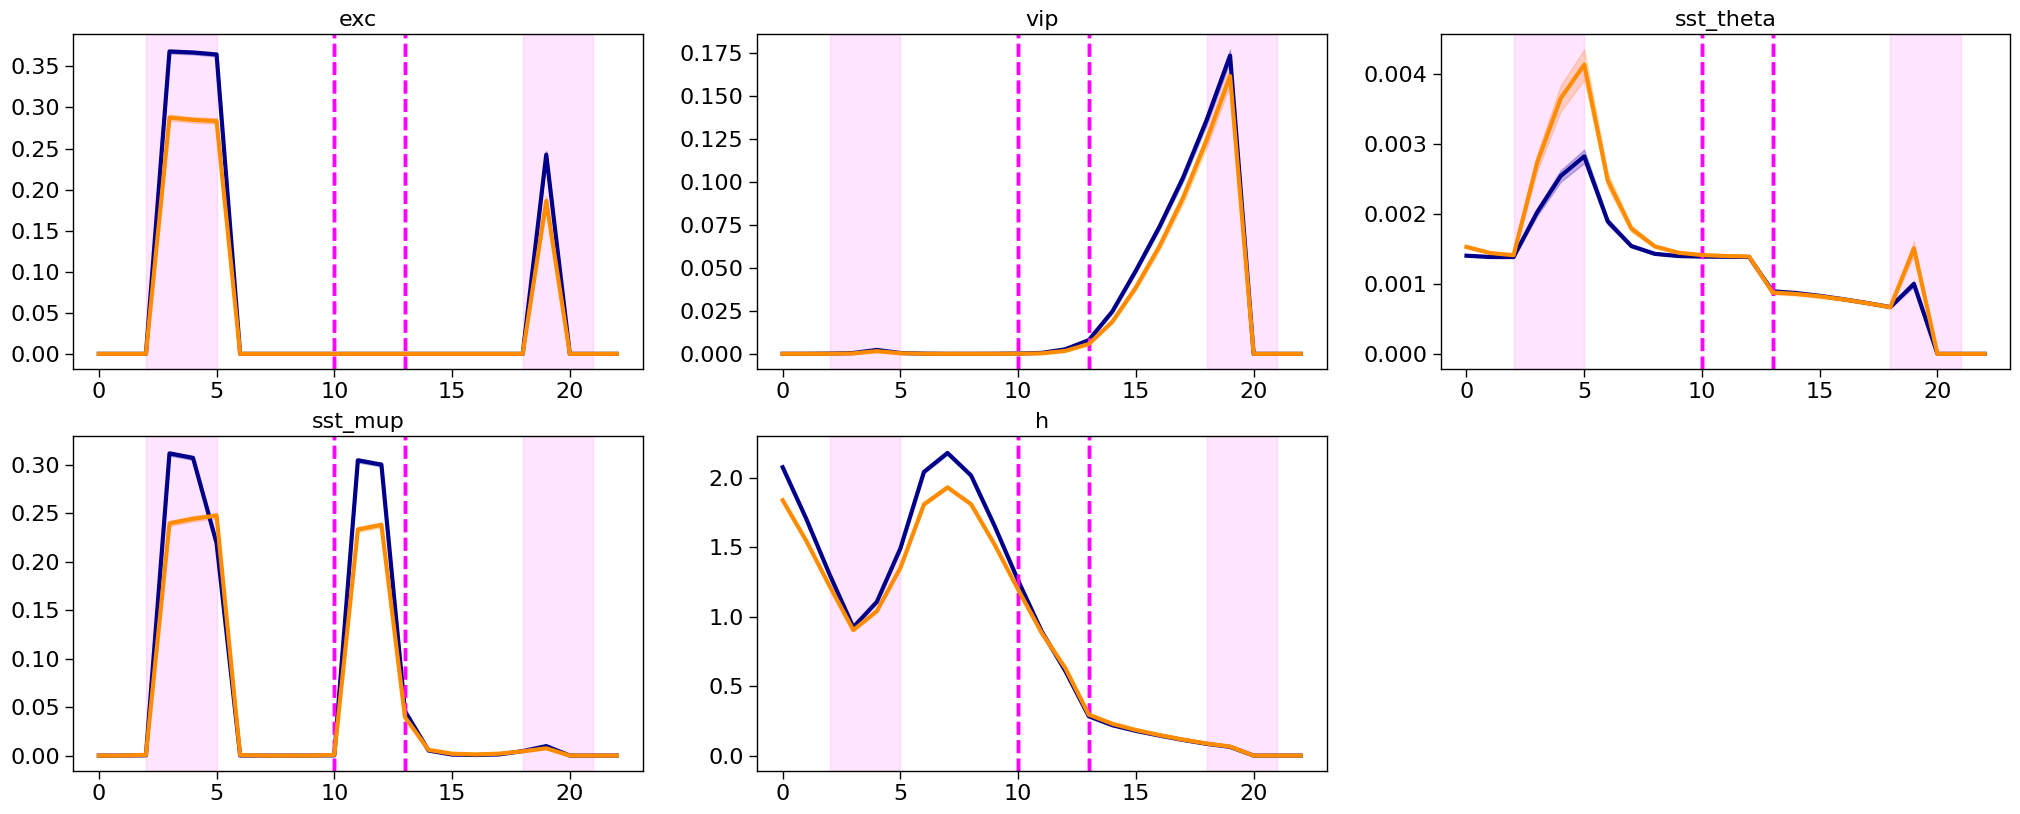

In [7]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(omission_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_omission_responses(args, ax, omission_responses['novel'][pop], "Novel", trace_clr="darkblue", image_clr="magenta", sem=True)
        plot_omission_responses(args, ax, omission_responses['familiar'][pop], "Familiar", trace_clr="darkorange", image_clr="magenta", sem=True)
        _ = ax.set_title(f"{pop}")

In [8]:
args, change_responses, omission_responses = load_results_files("./results/perception_action", "perception_action")
args = Namespace(**args)

Loaded perception_action_5649
Loaded perception_action_3999
Loaded perception_action_6111
Loaded perception_action_9628
Loaded perception_action_7542
Loaded perception_action_8874
Loaded perception_action_4241
Loaded perception_action_1712
Loaded perception_action_4143
Loaded perception_action_4284


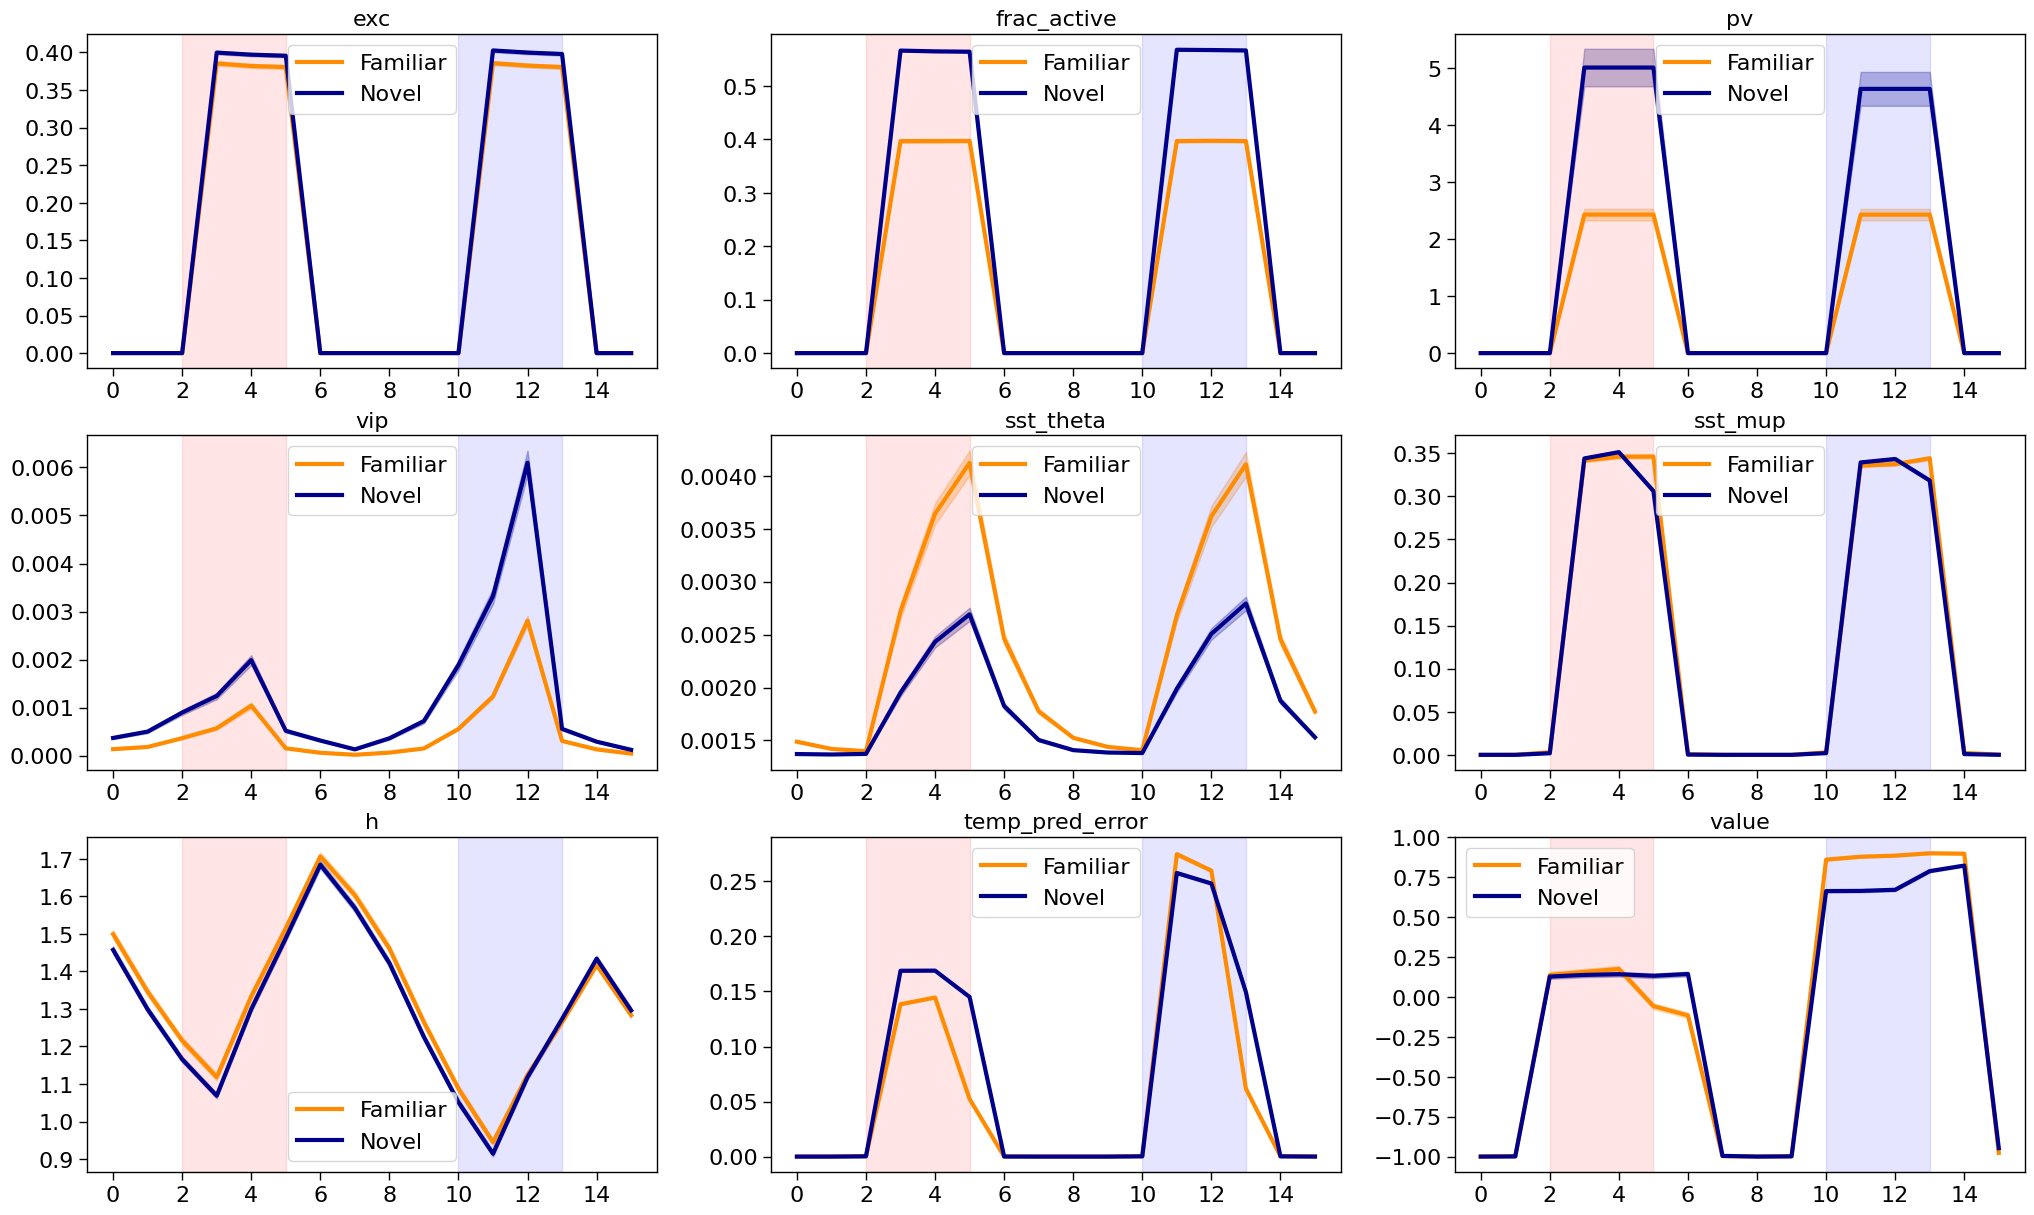

In [9]:
##### plot responses around image change

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(change_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_change_responses(args, ax, change_responses['familiar'][pop], "Familiar", "darkorange")
        plot_change_responses(args, ax, change_responses['novel'][pop], "Novel", "darkblue")
        ax.set_title(f"{pop}")
        ax.legend()

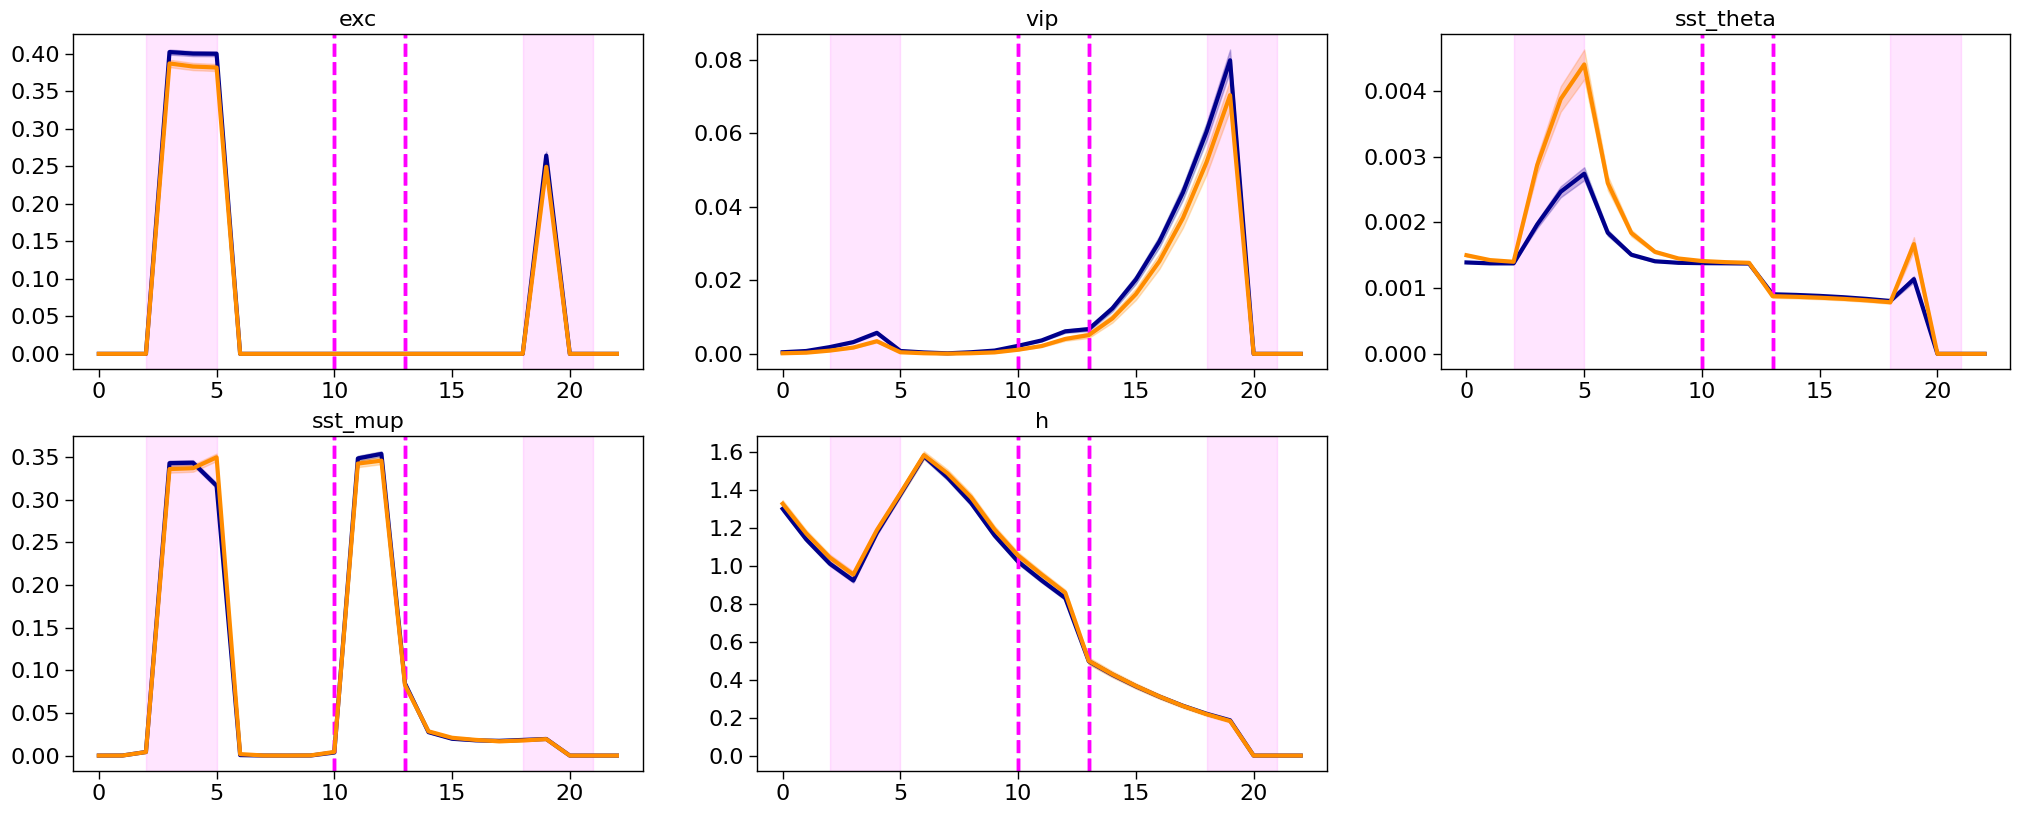

In [10]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(omission_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_omission_responses(args, ax, omission_responses['novel'][pop], "Novel", trace_clr="darkblue", image_clr="magenta", sem=True)
        plot_omission_responses(args, ax, omission_responses['familiar'][pop], "Familiar", trace_clr="darkorange", image_clr="magenta", sem=True)
        _ = ax.set_title(f"{pop}")